# MNIST Dataset

---

## Code Source and Improvement
The code was obtained from : [Aladdin Persson](https://www.youtube.com/watch?v=Yla6MqEePh8&ab_channel=AladdinPersson), [The code in Github](https://github.com/aladdinpersson/HelloMnist) and the content was modified.

* The data comes from Tensorflow-datasets (to install it, type this : pip install tensorflow-datasets)
* This code also use another library : Tensorflow-addons (to install it, type this : pip install tensorflow-addons)

---

## Keras Note
Read : https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/
> .... Google announced TensorFlow 2.0 in June 2019, they declared that Keras is now the official high-level API of TensorFlow for quick and easy model design and training. ...

**Old version** : keras need to be installed using pip install keras, and tensorflow as well.
**New version** : only need to install tensorflow

---

## Code Explanation

1. Normalize Image function : It was purposed to scale the image DN value from 0 to 1.

2. Augment function (Abbreviation of Augmentation) : It was purposed to increase the number of training data not in test data. (See also : [Tensorflow explanation](https://www.tensorflow.org/tutorials/images/data_augmentation). The original data was augmented with the rotated image in this case

3. Ds.map (Dataset map) : See the explanation here [Dataset Map Tensorflow](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

4. AUTOTUNE : See the explanation here [Autotune Tensorflow](https://www.tensorflow.org/api_docs/python/tf/data/experimental)

5. layers.Conv2D : Feature extraction layer through filter. example : x = layers.Conv2D(32, 3)(inputs). it means you want to create a filter Convolutional layer from 32 filter type with kernel size 3. Inputs is the inputs

6. layer.BatchNormalization : It normalize the input by scaling it from 0 to 1. See explanation here [Batch Normalization Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

7. layers.Flatten : Flatten the convoluted layer into one column. See explanation here : [Flatten Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

8. layers.Dense : It is the fully connected neuron. See explanation here : [Dense Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

9. Loss type used in this project : [Sparse Categorical Cross Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

10. Optimizers : [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam). Optimizer Explanation : (https://ruder.io/optimizing-gradient-descent/), (https://mlfromscratch.com/optimizers-explained/#/)

11. layers.Dropout : See explanation here : [Dropout Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout), (https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/),

---

##  1st Attempt : Processing with 20 Epochs and without dropout

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1875/1875 - 48s - loss: 0.3658 - accuracy: 0.8965
Epoch 2/20
1875/1875 - 48s - loss: 0.1221 - accuracy: 0.9646
Epoch 3/20
1875/1875 - 47s - loss: 0.0885 - accuracy: 0.9738
Epoch 4/20
1875/1875 - 50s - loss: 0.0748 - accuracy: 0.9776
Epoch 5/20
1875/1875 - 49s - loss: 0.0654 - accuracy: 0.9802
Epoch 6/20
1875/1875 - 47s - loss: 0.0583 - accuracy: 0.9828
Epoch 7/20
1875/1875 - 46s - loss: 0.0540 - accuracy: 0.9841
Epoch 8/20
1875/1875 - 47s - loss: 0.0498 - accuracy: 0.9845
Epoch 9/20
1875/1875 - 47s - loss: 0.0464 - accuracy: 0.9864
Epoch 10/20
1875/1875 - 47s - loss: 0.0446 - accuracy: 0.9866
Epoch 11/20
1875/1875 - 48s - loss: 0.0402 - accuracy: 0.9883
Epoch 12/20
1875/1875 - 47s - loss: 0.0382 - accuracy: 0.9880
Epoch 13/20
1875/1875 - 46s - loss: 0.0372 - accuracy: 0.9885
Epoch 14/20
1875/1875 - 48s - loss: 0.0369 - accuracy: 0.9888
Epoch 15/20
1875/1875 - 48s - loss: 0.0337 - accuracy: 0.9897
Epoch 16/20
1875/1875 - 48s - loss: 0.0307 - accuracy: 0.9904
Epoch 17/20
1875/

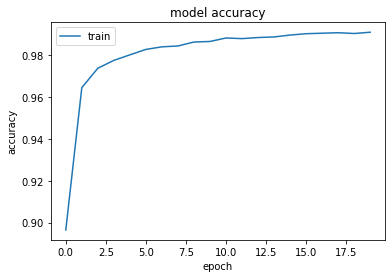

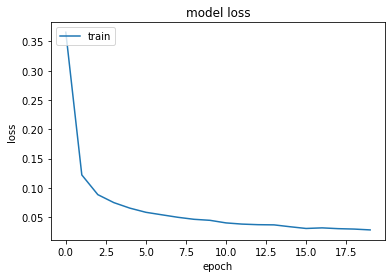

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=False, # Do not shuffle the data
    as_supervised=True, # This function will return (image,label)
    with_info=True, # Retrieve dataset info
)

def normalize_img(image,label):
    return tf.cast(image, tf.float32) / 255.0, label

def rotate(img, max_degrees=45):
    degrees = tf.random.uniform([], -max_degrees, max_degrees, dtype=tf.float32)

    img = tfa.image.rotate(img, tf.cast(degrees, tf.float32)*math.pi/180, interpolation="BILINEAR")
    return img

def augment(image,label):
    image = tf.image.resize(image, size=[28,28])

    # Rotate the image
    image = rotate(image)

    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.4, upper=1.6)

    return image,label

AUTOTUNE = tf.data.experimental.AUTOTUNE
Batch_size = 32

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.map(augment, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.batch(Batch_size)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(Batch_size)
ds_test = ds_test.prefetch(AUTOTUNE)

def my_model():  
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=1e-4),
    metrics=["accuracy"],
)
Training = model.fit(ds_train, epochs=20, verbose=2)
model.evaluate(ds_test)

model.summary()
model.save("MNIST_1st_Group3_2021_20Epoch_noDropout.h5")

# summarize history for accuracy
plt.plot(Training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## 2nd Attempt : Processing with 20 Epochs and dropout

Epoch 1/20
1875/1875 - 53s - loss: 0.6142 - accuracy: 0.8120
Epoch 2/20
1875/1875 - 51s - loss: 0.2014 - accuracy: 0.9390
Epoch 3/20
1875/1875 - 52s - loss: 0.1442 - accuracy: 0.9559
Epoch 4/20
1875/1875 - 51s - loss: 0.1187 - accuracy: 0.9639
Epoch 5/20
1875/1875 - 53s - loss: 0.1020 - accuracy: 0.9688
Epoch 6/20
1875/1875 - 61s - loss: 0.0898 - accuracy: 0.9725
Epoch 7/20
1875/1875 - 58s - loss: 0.0826 - accuracy: 0.9750
Epoch 8/20
1875/1875 - 53s - loss: 0.0755 - accuracy: 0.9762
Epoch 9/20
1875/1875 - 54s - loss: 0.0694 - accuracy: 0.9784
Epoch 10/20
1875/1875 - 53s - loss: 0.0661 - accuracy: 0.9797
Epoch 11/20
1875/1875 - 53s - loss: 0.0640 - accuracy: 0.9801
Epoch 12/20
1875/1875 - 53s - loss: 0.0617 - accuracy: 0.9814
Epoch 13/20
1875/1875 - 53s - loss: 0.0565 - accuracy: 0.9828
Epoch 14/20
1875/1875 - 53s - loss: 0.0552 - accuracy: 0.9829
Epoch 15/20
1875/1875 - 54s - loss: 0.0543 - accuracy: 0.9835
Epoch 16/20
1875/1875 - 54s - loss: 0.0526 - accuracy: 0.9842
Epoch 17/20
1875/

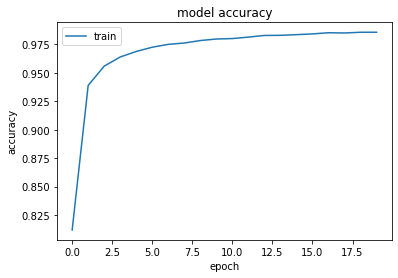

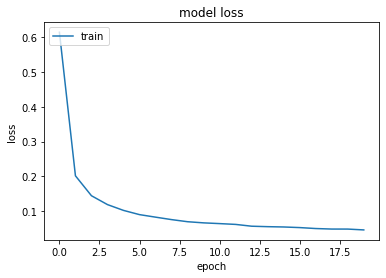

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=False, # Do not shuffle the data
    as_supervised=True, # This function will return (image,label)
    with_info=True, # Retrieve dataset info
)

def normalize_img(image,label):
    return tf.cast(image, tf.float32) / 255.0, label

def rotate(img, max_degrees=45):
    degrees = tf.random.uniform([], -max_degrees, max_degrees, dtype=tf.float32)

    img = tfa.image.rotate(img, tf.cast(degrees, tf.float32)*math.pi/180, interpolation="BILINEAR")
    return img

def augment(image,label):
    image = tf.image.resize(image, size=[28,28])

    # Rotate the image
    image = rotate(image)

    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.4, upper=1.6)

    return image,label

AUTOTUNE = tf.data.experimental.AUTOTUNE
Batch_size = 32

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.map(augment, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.batch(Batch_size)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(Batch_size)
ds_test = ds_test.prefetch(AUTOTUNE)

def my_model():  
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=1e-4),
    metrics=["accuracy"],
)
Training = model.fit(ds_train, epochs=20, verbose=2)
model.evaluate(ds_test)

model.summary()
model.save("MNIST_2nd_Group3_2021_20Epoch_YesDropout.h5")

# summarize history for accuracy
plt.plot(Training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## 3rd Attempt : Processing with 50 Epochs and without dropout

Epoch 1/50
1875/1875 - 49s - loss: 0.3596 - accuracy: 0.8981
Epoch 2/50
1875/1875 - 48s - loss: 0.1155 - accuracy: 0.9653
Epoch 3/50
1875/1875 - 48s - loss: 0.0879 - accuracy: 0.9738
Epoch 4/50
1875/1875 - 49s - loss: 0.0715 - accuracy: 0.9790
Epoch 5/50
1875/1875 - 48s - loss: 0.0605 - accuracy: 0.9814
Epoch 6/50
1875/1875 - 50s - loss: 0.0562 - accuracy: 0.9828
Epoch 7/50
1875/1875 - 50s - loss: 0.0524 - accuracy: 0.9841
Epoch 8/50
1875/1875 - 50s - loss: 0.0468 - accuracy: 0.9857
Epoch 9/50
1875/1875 - 50s - loss: 0.0449 - accuracy: 0.9865
Epoch 10/50
1875/1875 - 50s - loss: 0.0411 - accuracy: 0.9871
Epoch 11/50
1875/1875 - 50s - loss: 0.0397 - accuracy: 0.9879
Epoch 12/50
1875/1875 - 50s - loss: 0.0367 - accuracy: 0.9886
Epoch 13/50
1875/1875 - 50s - loss: 0.0371 - accuracy: 0.9889
Epoch 14/50
1875/1875 - 50s - loss: 0.0336 - accuracy: 0.9894
Epoch 15/50
1875/1875 - 51s - loss: 0.0319 - accuracy: 0.9903
Epoch 16/50
1875/1875 - 53s - loss: 0.0321 - accuracy: 0.9898
Epoch 17/50
1875/

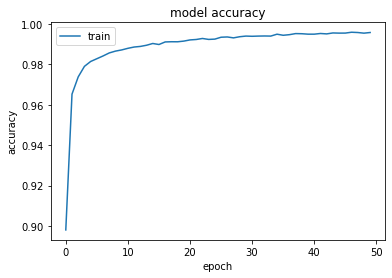

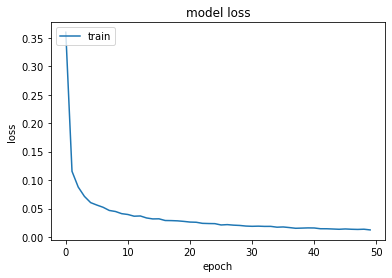

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=False, # Do not shuffle the data
    as_supervised=True, # This function will return (image,label)
    with_info=True, # Retrieve dataset info
)

def normalize_img(image,label):
    return tf.cast(image, tf.float32) / 255.0, label

def rotate(img, max_degrees=45):
    degrees = tf.random.uniform([], -max_degrees, max_degrees, dtype=tf.float32)

    img = tfa.image.rotate(img, tf.cast(degrees, tf.float32)*math.pi/180, interpolation="BILINEAR")
    return img

def augment(image,label):
    image = tf.image.resize(image, size=[28,28])

    # Rotate the image
    image = rotate(image)

    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.4, upper=1.6)

    return image,label

AUTOTUNE = tf.data.experimental.AUTOTUNE
Batch_size = 32

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.map(augment, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.batch(Batch_size)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(Batch_size)
ds_test = ds_test.prefetch(AUTOTUNE)

def my_model():  
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=1e-4),
    metrics=["accuracy"],
)
Training = model.fit(ds_train, epochs=50, verbose=2)
model.evaluate(ds_test)

model.summary()
model.save("MNIST_3rd_Group3_2021_50Epoch_noDropout.h5")

# summarize history for accuracy
plt.plot(Training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## 4th Attempt : Processing with 50 Epochs and dropout

Epoch 1/50
1875/1875 - 51s - loss: 0.6234 - accuracy: 0.8077
Epoch 2/50
1875/1875 - 50s - loss: 0.2021 - accuracy: 0.9402
Epoch 3/50
1875/1875 - 50s - loss: 0.1475 - accuracy: 0.9548
Epoch 4/50
1875/1875 - 50s - loss: 0.1190 - accuracy: 0.9649
Epoch 5/50
1875/1875 - 50s - loss: 0.1040 - accuracy: 0.9684
Epoch 6/50
1875/1875 - 49s - loss: 0.0925 - accuracy: 0.9718
Epoch 7/50
1875/1875 - 50s - loss: 0.0822 - accuracy: 0.9748
Epoch 8/50
1875/1875 - 50s - loss: 0.0780 - accuracy: 0.9762
Epoch 9/50
1875/1875 - 49s - loss: 0.0717 - accuracy: 0.9782
Epoch 10/50
1875/1875 - 49s - loss: 0.0674 - accuracy: 0.9799
Epoch 11/50
1875/1875 - 49s - loss: 0.0632 - accuracy: 0.9807
Epoch 12/50
1875/1875 - 50s - loss: 0.0620 - accuracy: 0.9807
Epoch 13/50
1875/1875 - 49s - loss: 0.0600 - accuracy: 0.9813
Epoch 14/50
1875/1875 - 49s - loss: 0.0563 - accuracy: 0.9829
Epoch 15/50
1875/1875 - 49s - loss: 0.0559 - accuracy: 0.9826
Epoch 16/50
1875/1875 - 49s - loss: 0.0536 - accuracy: 0.9835
Epoch 17/50
1875/

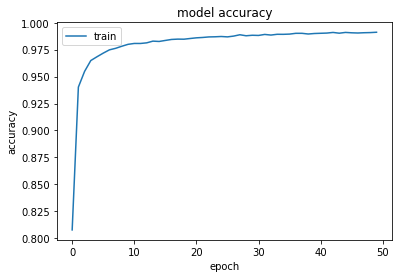

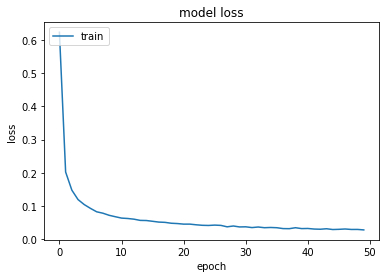

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=False, # Do not shuffle the data
    as_supervised=True, # This function will return (image,label)
    with_info=True, # Retrieve dataset info
)

def normalize_img(image,label):
    return tf.cast(image, tf.float32) / 255.0, label

def rotate(img, max_degrees=45):
    degrees = tf.random.uniform([], -max_degrees, max_degrees, dtype=tf.float32)

    img = tfa.image.rotate(img, tf.cast(degrees, tf.float32)*math.pi/180, interpolation="BILINEAR")
    return img

def augment(image,label):
    image = tf.image.resize(image, size=[28,28])

    # Rotate the image
    image = rotate(image)

    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.4, upper=1.6)

    return image,label

AUTOTUNE = tf.data.experimental.AUTOTUNE
Batch_size = 32

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.map(augment, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.batch(Batch_size)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(Batch_size)
ds_test = ds_test.prefetch(AUTOTUNE)

def my_model():  
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=1e-4),
    metrics=["accuracy"],
)
Training = model.fit(ds_train, epochs=50, verbose=2)
model.evaluate(ds_test)

model.summary()
model.save("MNIST_4th_Group3_2021_50Epoch_YesoDropout.h5")

# summarize history for accuracy
plt.plot(Training.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Conclusion : 

Result : 
* 1st Attempt has 
    * Training accuracy : 0.9911 99.11%
    * Training loss : 0.0282
    * Test accuracy : 0.9907 99.07%
    * Test loss : 0.0326
* 2nd Attempt has 
    * Training accuracy : 0.9857 98.57%
    * Training loss : 0.0459
    * Test accuracy : 0.9905 99.05%
    * Test loss : 0.0285
* 3rd Attempt has 
    * Training accuracy : 0.9958 99.58%
    * Training loss : 0.0126
    * Test accuracy : 0.9887 98.87%
    * Test loss : 0.0373
* 4th Attempt has 
    * Training accuracy : 0.9911 99.11%
    * Training loss : 0.0276
    * Test accuracy : 0.9927 99.27%
    * Test loss : 0.0220